In [40]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

In [14]:
records = pd.read_csv('NFLRecords.csv') 
picks = pd.read_csv('draftpicks.csv')


In [43]:
#Combine positions usually considered roughly equivalent
new = 'C', 'G', 'OG', 'OL'
picks['Pos'] = picks['Pos'].replace(new, 'IOL')
picks['Pos'].nunique()
picks.head(20)

new = 'T'
picks['Pos'] = picks['Pos'].replace(new, 'OT')
picks['Pos'].nunique()
picks.head(20)


new = 'FS', 'SS', 'S', 'DB'
picks['Pos'] = picks['Pos'].replace(new, 'DB')
picks['Pos'].nunique()


new = 'TE', 'FB'
picks['Pos'] = picks['Pos'].replace(new, 'TE/FB')
picks['Pos'].nunique()

new = 'NT'
picks['Pos'] = picks['Pos'].replace(new, 'DT')
picks['Pos'].nunique()
picks.head(20)

new = 'LB'
picks['Pos'] = picks['Pos'].replace(new, 'ILB')
picks['Pos'].nunique()
picks.head(20)

new = 'DL'
picks['Pos'] = picks['Pos'].replace(new, 'DT')
picks['Pos'].nunique()
picks.head(20)

#Remove K, P, LS
new = 'K' , 'P' , 'LS'
picks = picks[~picks['Pos'].isin(new)]
picks['Pos'].nunique()
picks.head(20)


,Rnd,Pick,Tm,Player,Pos,Age,To,AP1,PB,St,wAV,DrAV,G,Tag,Year
0,1,1,CLE,Baker Mayfield,QB,23.0,2023.0,0,1,4,57,39,89.0,MayfBa00,2018
1,1,2,NYG,Saquon Barkley,RB,21.0,2023.0,0,2,4,42,42,74.0,BarkSa00,2018
2,1,3,NYJ,Sam Darnold,QB,21.0,2023.0,0,0,4,25,16,66.0,DarnSa00,2018
3,1,4,CLE,Denzel Ward,CB,21.0,2023.0,0,3,5,36,36,79.0,WardDe02,2018
4,1,5,DEN,Bradley Chubb,DE,22.0,2023.0,0,2,2,35,25,73.0,ChubBr00,2018
5,1,6,IND,Quenton Nelson,IOL,22.0,2023.0,3,6,5,62,62,95.0,NelsQu00,2018
6,1,7,BUF,Josh Allen,QB,22.0,2023.0,0,3,5,83,83,94.0,AlleJo02,2018
7,1,8,CHI,Roquan Smith,ILB,21.0,2023.0,2,2,5,68,38,94.0,SmitRo07,2018
8,1,9,SFO,Mike McGlinchey,OT,23.0,2023.0,0,0,4,37,31,85.0,McGlMi00,2018
9,1,10,ARI,Josh Rosen,QB,21.0,2021.0,0,0,1,3,2,24.0,RoseJo01,2018


In [94]:
picks['Pos'].value_counts()

DB       839
WR       619
ILB      543
DE       429
IOL      419
DT       401
RB       392
OT       367
TE/FB    330
QB       236
CB       115
OLB       69
Name: Pos, dtype: int64

In [30]:
#Get raw NA proportions for each feature
missing = picks.isna().sum()
missing = missing/len(picks) * 100
print(missing)
#Looks like nothing major is missing besides a small portion of ages. Other NAs are for players that never actually played in the NFL.

Rnd        0.000000
Pick       0.000000
Tm         0.000000
Player     0.000000
Pos        0.000000
Age        5.379281
To        10.086153
AP1        0.000000
PB         0.000000
St         0.000000
wAV        0.000000
DrAV       0.000000
G         10.086153
Tag        0.000000
Year       0.000000
dtype: float64


<BarContainer object of 12 artists>

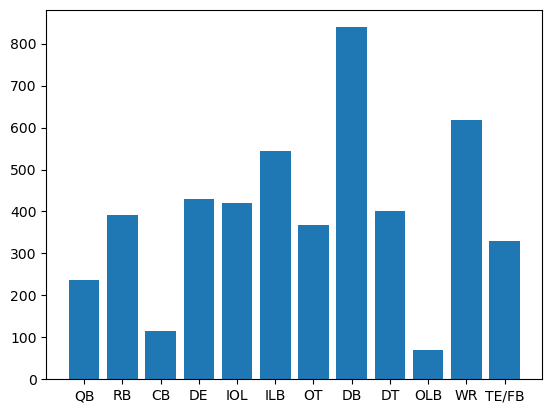

In [58]:
#Plot draft frequncies by position
order = ['QB', 'RB', 'CB', 'DE', 'IOL', 'ILB', 'OT', 'DB', 'DT', 'OLB', 'WR', 'TE/FB']
y = picks['Pos'].value_counts().reindex(order)
y
x = picks['Pos'].unique()
x
plt.bar(x,y)

In [71]:
AP_Or_PB_Round1 = picks[(picks['AP1'] > 0) | (picks['PB'] > 0) & (picks['Rnd'] ==1)]
len(AP_Or_PB_Round1)/len(picks[(picks['Rnd'] == 1)]) * 100
#About 62% of players selected in the first round of this dataset have at least one Pro Bowl or All Pro selection

61.69154228855721

In [84]:
AP_Or_PB_Total = picks[(picks['AP1'] > 0) | (picks['PB'] > 0)]
len(AP_Or_PB_Total)/len(picks) * 100
#Only 12.52% of players selected in this dataset were Pro Bowlers or All Pros at least once

12.523639420046228

In [93]:
AP_Or_PB_Total['Pos'].value_counts()
#Total amount of all pros or pro bowlers for each position

DB       97
WR       73
RB       63
ILB      63
DE       60
IOL      53
OT       49
QB       40
DT       37
TE/FB    37
CB       12
OLB      12
Name: Pos, dtype: int64